In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass 
import numpy as np
password = getpass.getpass()

········


In [2]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/happiness'
engine = create_engine(connection_string)
query = '''SELECT*
FROM corruption 
JOIN education 
USING (country)
JOIN gender
USING (country)
JOIN giving
USING (country)
JOIN health
USING (country)
JOIN suicide
USING (country)
JOIN hscore
USING (country);'''

data = pd.read_sql_query(query, engine)
data.head()

,country,CPI 2015 Score,lu,lpc,lsc,lhc,yr_sch,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Employers, female (% of female employment)",Law prohibits discr employ b gender,...,Value,First Tooltip,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,11,45.44,18.22,9.63,4.97,4.826,81.6930,1.02,0,...,48.57%,4.8,2015,3.982855,7.701992,0.528597,53.200001,0.388928,0.079864,0.880638
1,Albania,36,2.46,2.83,34.48,9.30,10.972,20.0772,0.96,1,...,31.43%,6.0,2015,4.606651,9.403102,0.639356,67.800003,0.703851,-0.080839,0.884793
2,Argentina,32,0.62,29.88,28.45,2.93,10.206,63.0960,2.36,1,...,34.29%,8.8,2015,6.697131,10.083059,0.926492,68.199997,0.881224,-0.173848,0.850906
3,Armenia,35,0.55,0.93,46.87,24.66,11.766,22.8308,0.34,1,...,44.29%,7.0,2015,4.348320,9.334446,0.722551,66.000000,0.551027,-0.202627,0.901462
4,Australia,79,0.54,2.88,40.93,24.63,12.457,11.9498,4.35,1,...,54.29%,13.8,2015,7.309061,10.779378,0.951862,72.699997,0.921871,0.331899,0.356554


In [324]:
data['Life Ladder'].describe()

count    109.000000
mean       5.479742
std        1.169461
min        2.701591
25%        4.633474
50%        5.559724
75%        6.387572
max        7.603434
Name: Life Ladder, dtype: float64

In [29]:
list(data['country'])

['Afghanistan',
 'Albania',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Bahrain',
 'Bangladesh',
 'Belgium',
 'Benin',
 'Bolivia',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Finland',
 'France',
 'Gabon',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guinea',
 'Haiti',
 'Honduras',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Kyrgyzstan',
 'Latvia',
 'Liberia',
 'Lithuania',
 'Luxembourg',
 'Malawi',
 'Malaysia',
 'Mali',
 'Malta',
 'Mauritania',
 'Mexico',
 'Mongolia',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Niger',
 'Norway',
 'Pakistan',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Rwa

In [3]:
data.isna().sum()/len(data)

country                                                          0.0
CPI 2015 Score                                                   0.0
lu                                                               0.0
lpc                                                              0.0
lsc                                                              0.0
lhc                                                              0.0
yr_sch                                                           0.0
Adolescent fertility rate (births per 1,000 women ages 15-19)    0.0
Employers, female (% of female employment)                       0.0
Law prohibits discr employ b gender                              0.0
Labor force, female (% of total labor force)                     0.0
The law prohibits disc access credit b gender                    0.0
The government administers of maternity leave benefits           0.0
There is paid parental leave                                     0.0
legislation addressing domestic vi

In [4]:
data.dtypes

country                                                           object
CPI 2015 Score                                                     int64
lu                                                               float64
lpc                                                              float64
lsc                                                              float64
lhc                                                              float64
yr_sch                                                           float64
Adolescent fertility rate (births per 1,000 women ages 15-19)    float64
Employers, female (% of female employment)                       float64
Law prohibits discr employ b gender                                int64
Labor force, female (% of total labor force)                     float64
The law prohibits disc access credit b gender                      int64
The government administers of maternity leave benefits             int64
There is paid parental leave                       

In [5]:
data['Value'].value_counts

<bound method IndexOpsMixin.value_counts of 0      48.57%
1      31.43%
2      34.29%
3      44.29%
4      54.29%
        ...  
104    41.43%
105       40%
106    37.14%
107    38.57%
108    41.43%
Name: Value, Length: 109, dtype: object>

In [6]:
def clean(x):
    if '%' in  str(x):
        x = x[:-1]
        return x

In [7]:
data['Value']=data['Value'].apply(clean)

In [8]:
data['Value']=data['Value'].astype(np.number)

In [9]:
data_values=data.drop(['country','year'],axis=1)

In [10]:
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
data['Value']

0      48.57
1      31.43
2      34.29
3      44.29
4      54.29
       ...  
104    41.43
105    40.00
106    37.14
107    38.57
108    41.43
Name: Value, Length: 109, dtype: float64

In [12]:
education=data[['lu','lpc','lsc','lhc','yr_sch','Freedom to make life choices','Generosity','Life Ladder']]

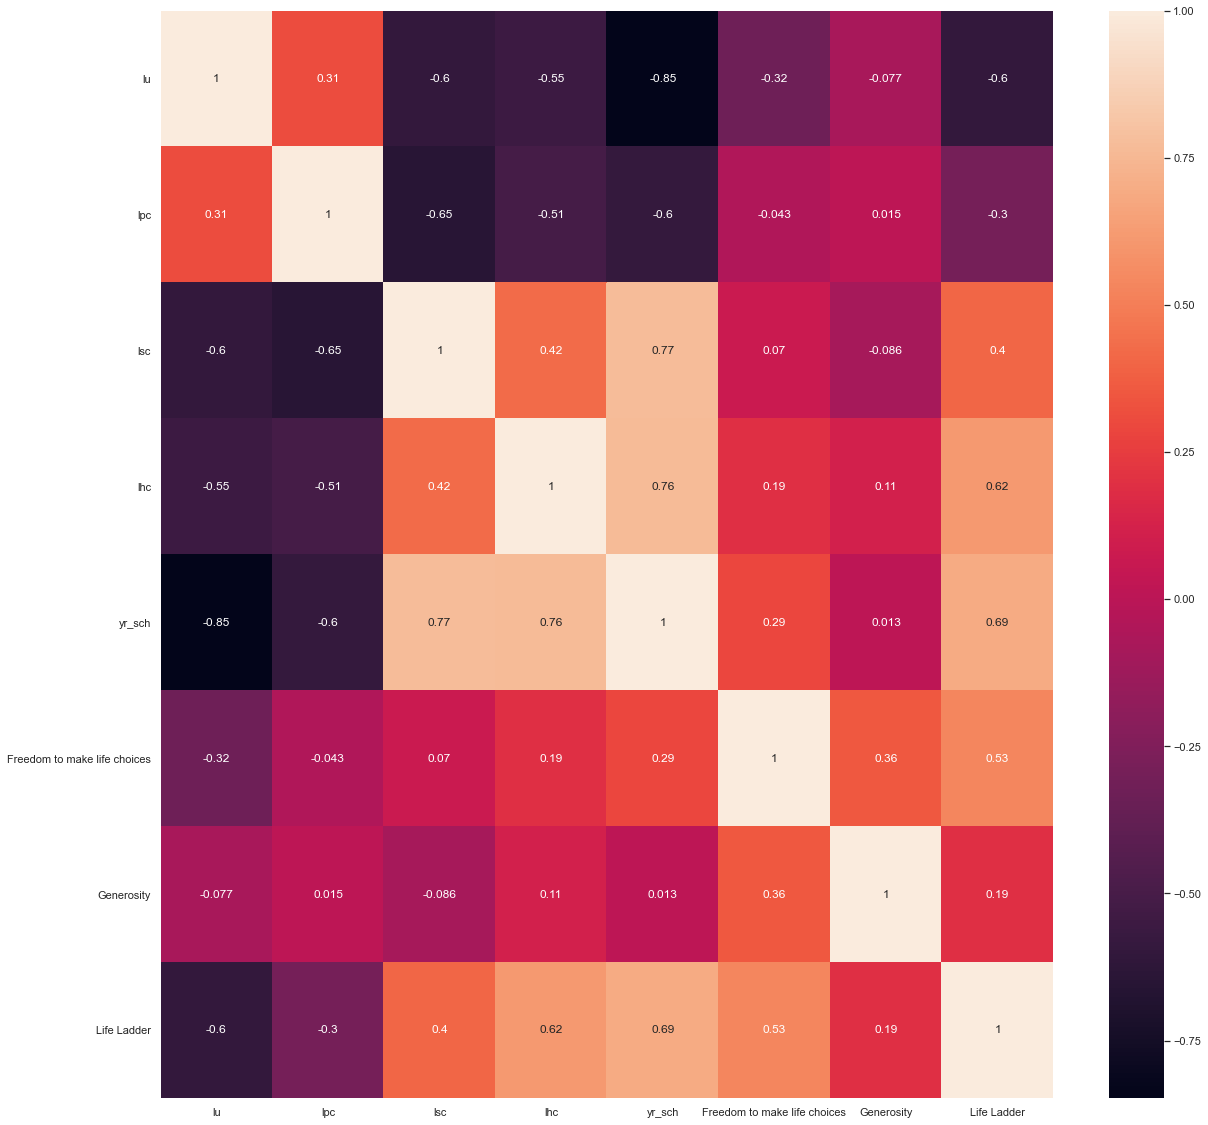

In [13]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(20,20))  
corr_matrix_education=education.corr()
sns.heatmap(corr_matrix_education,annot=True)
plt.show()

In [14]:
health=data[['Healthy life expectancy at birth','Value','Life Ladder']]

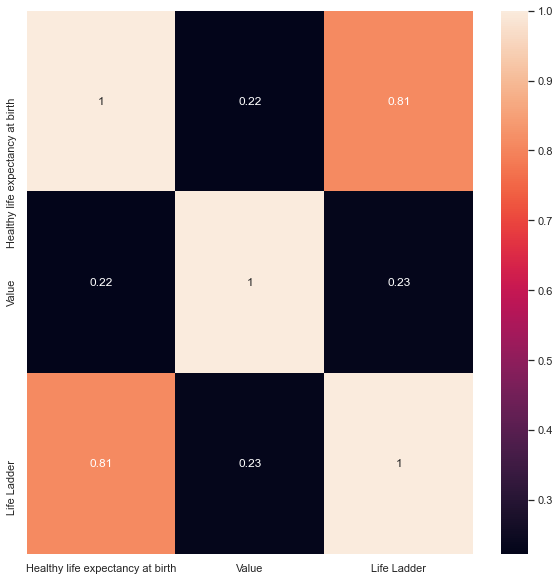

In [15]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(10,10))  
corr_matrix_health=health.corr()
sns.heatmap(corr_matrix_health,annot=True)
plt.show()

In [16]:
generosity=data[['Score(%)_hs','Score(%)_v','Score(%)_d','Generosity','Life Ladder']]

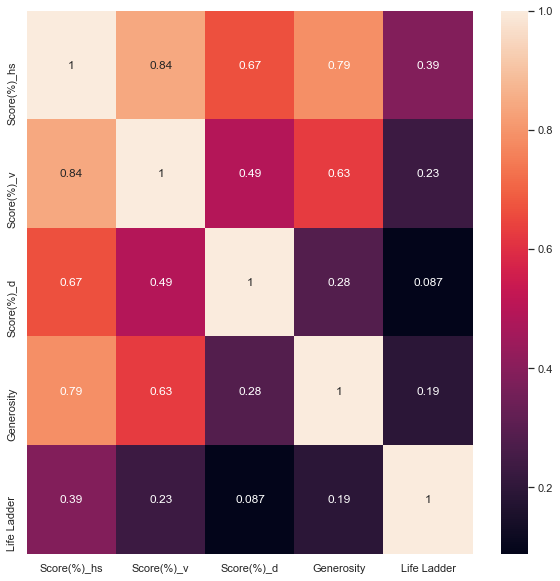

In [17]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(10,10))  
corr_matrix_generosity=generosity.corr()
sns.heatmap(corr_matrix_generosity,annot=True)
plt.show()

In [18]:
corruption=data[['Perceptions of corruption','CPI 2015 Score','Life Ladder']]

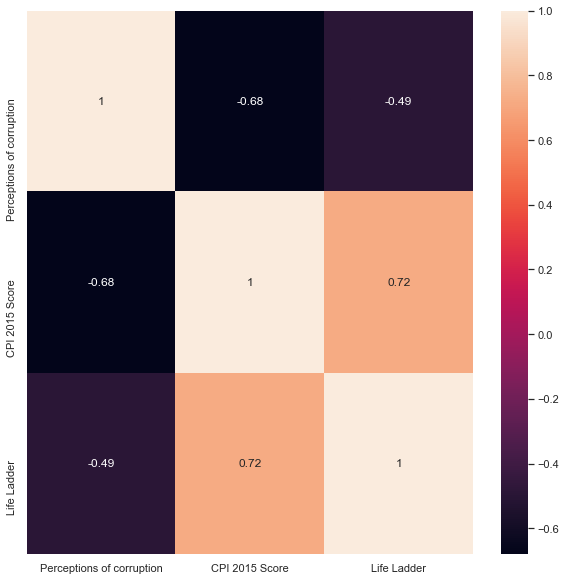

In [19]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(10,10))  
corr_matrix_corruption=corruption.corr()
sns.heatmap(corr_matrix_corruption,annot=True)
plt.show()

In [20]:
gender=data[['Adolescent fertility rate (births per 1,000 women ages 15-19)','Employers, female (% of female employment)','Law prohibits discr employ b gender','Labor force, female (% of total labor force)','The law prohibits disc access credit b gender','The government administers of maternity leave benefits','There is paid parental leave','legislation addressing domestic violence','Freedom to make life choices','Social support','Life Ladder']]

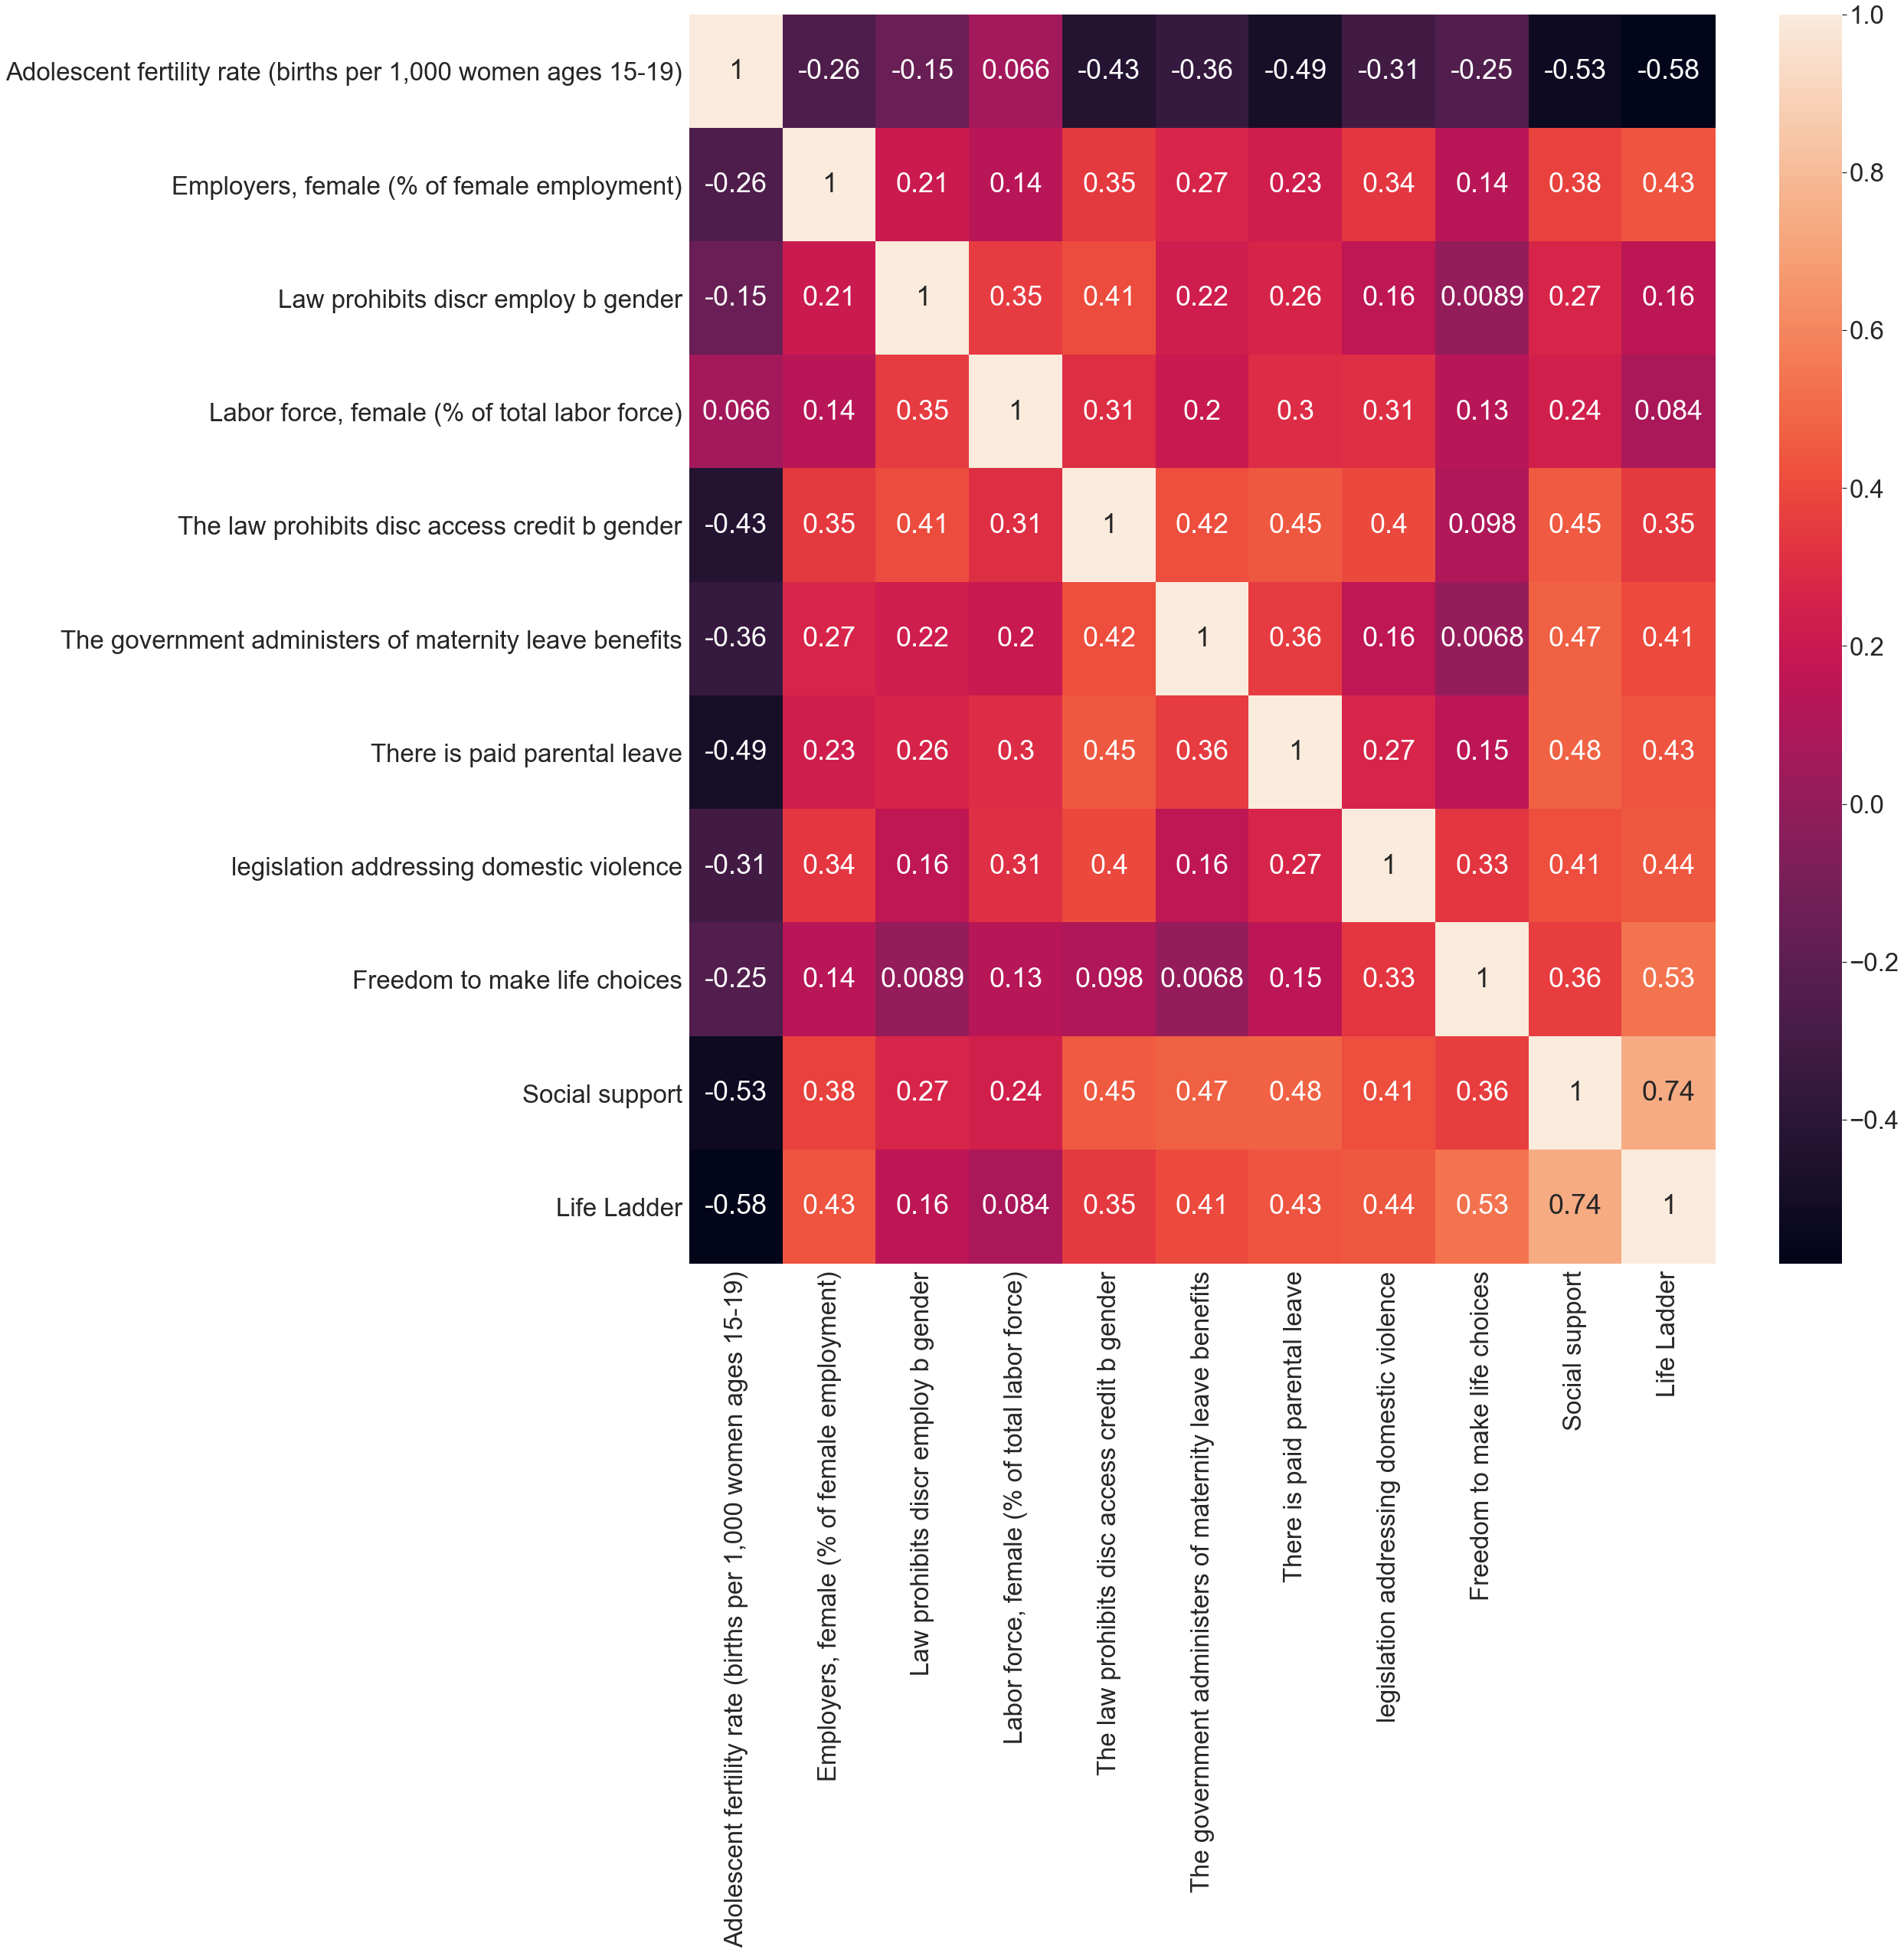

In [21]:
sns.set(font_scale=3)
fig, ax = plt.subplots(figsize=(30,30))  
corr_matrix_gender=gender.corr()
sns.heatmap(corr_matrix_gender,annot=True)
plt.show()

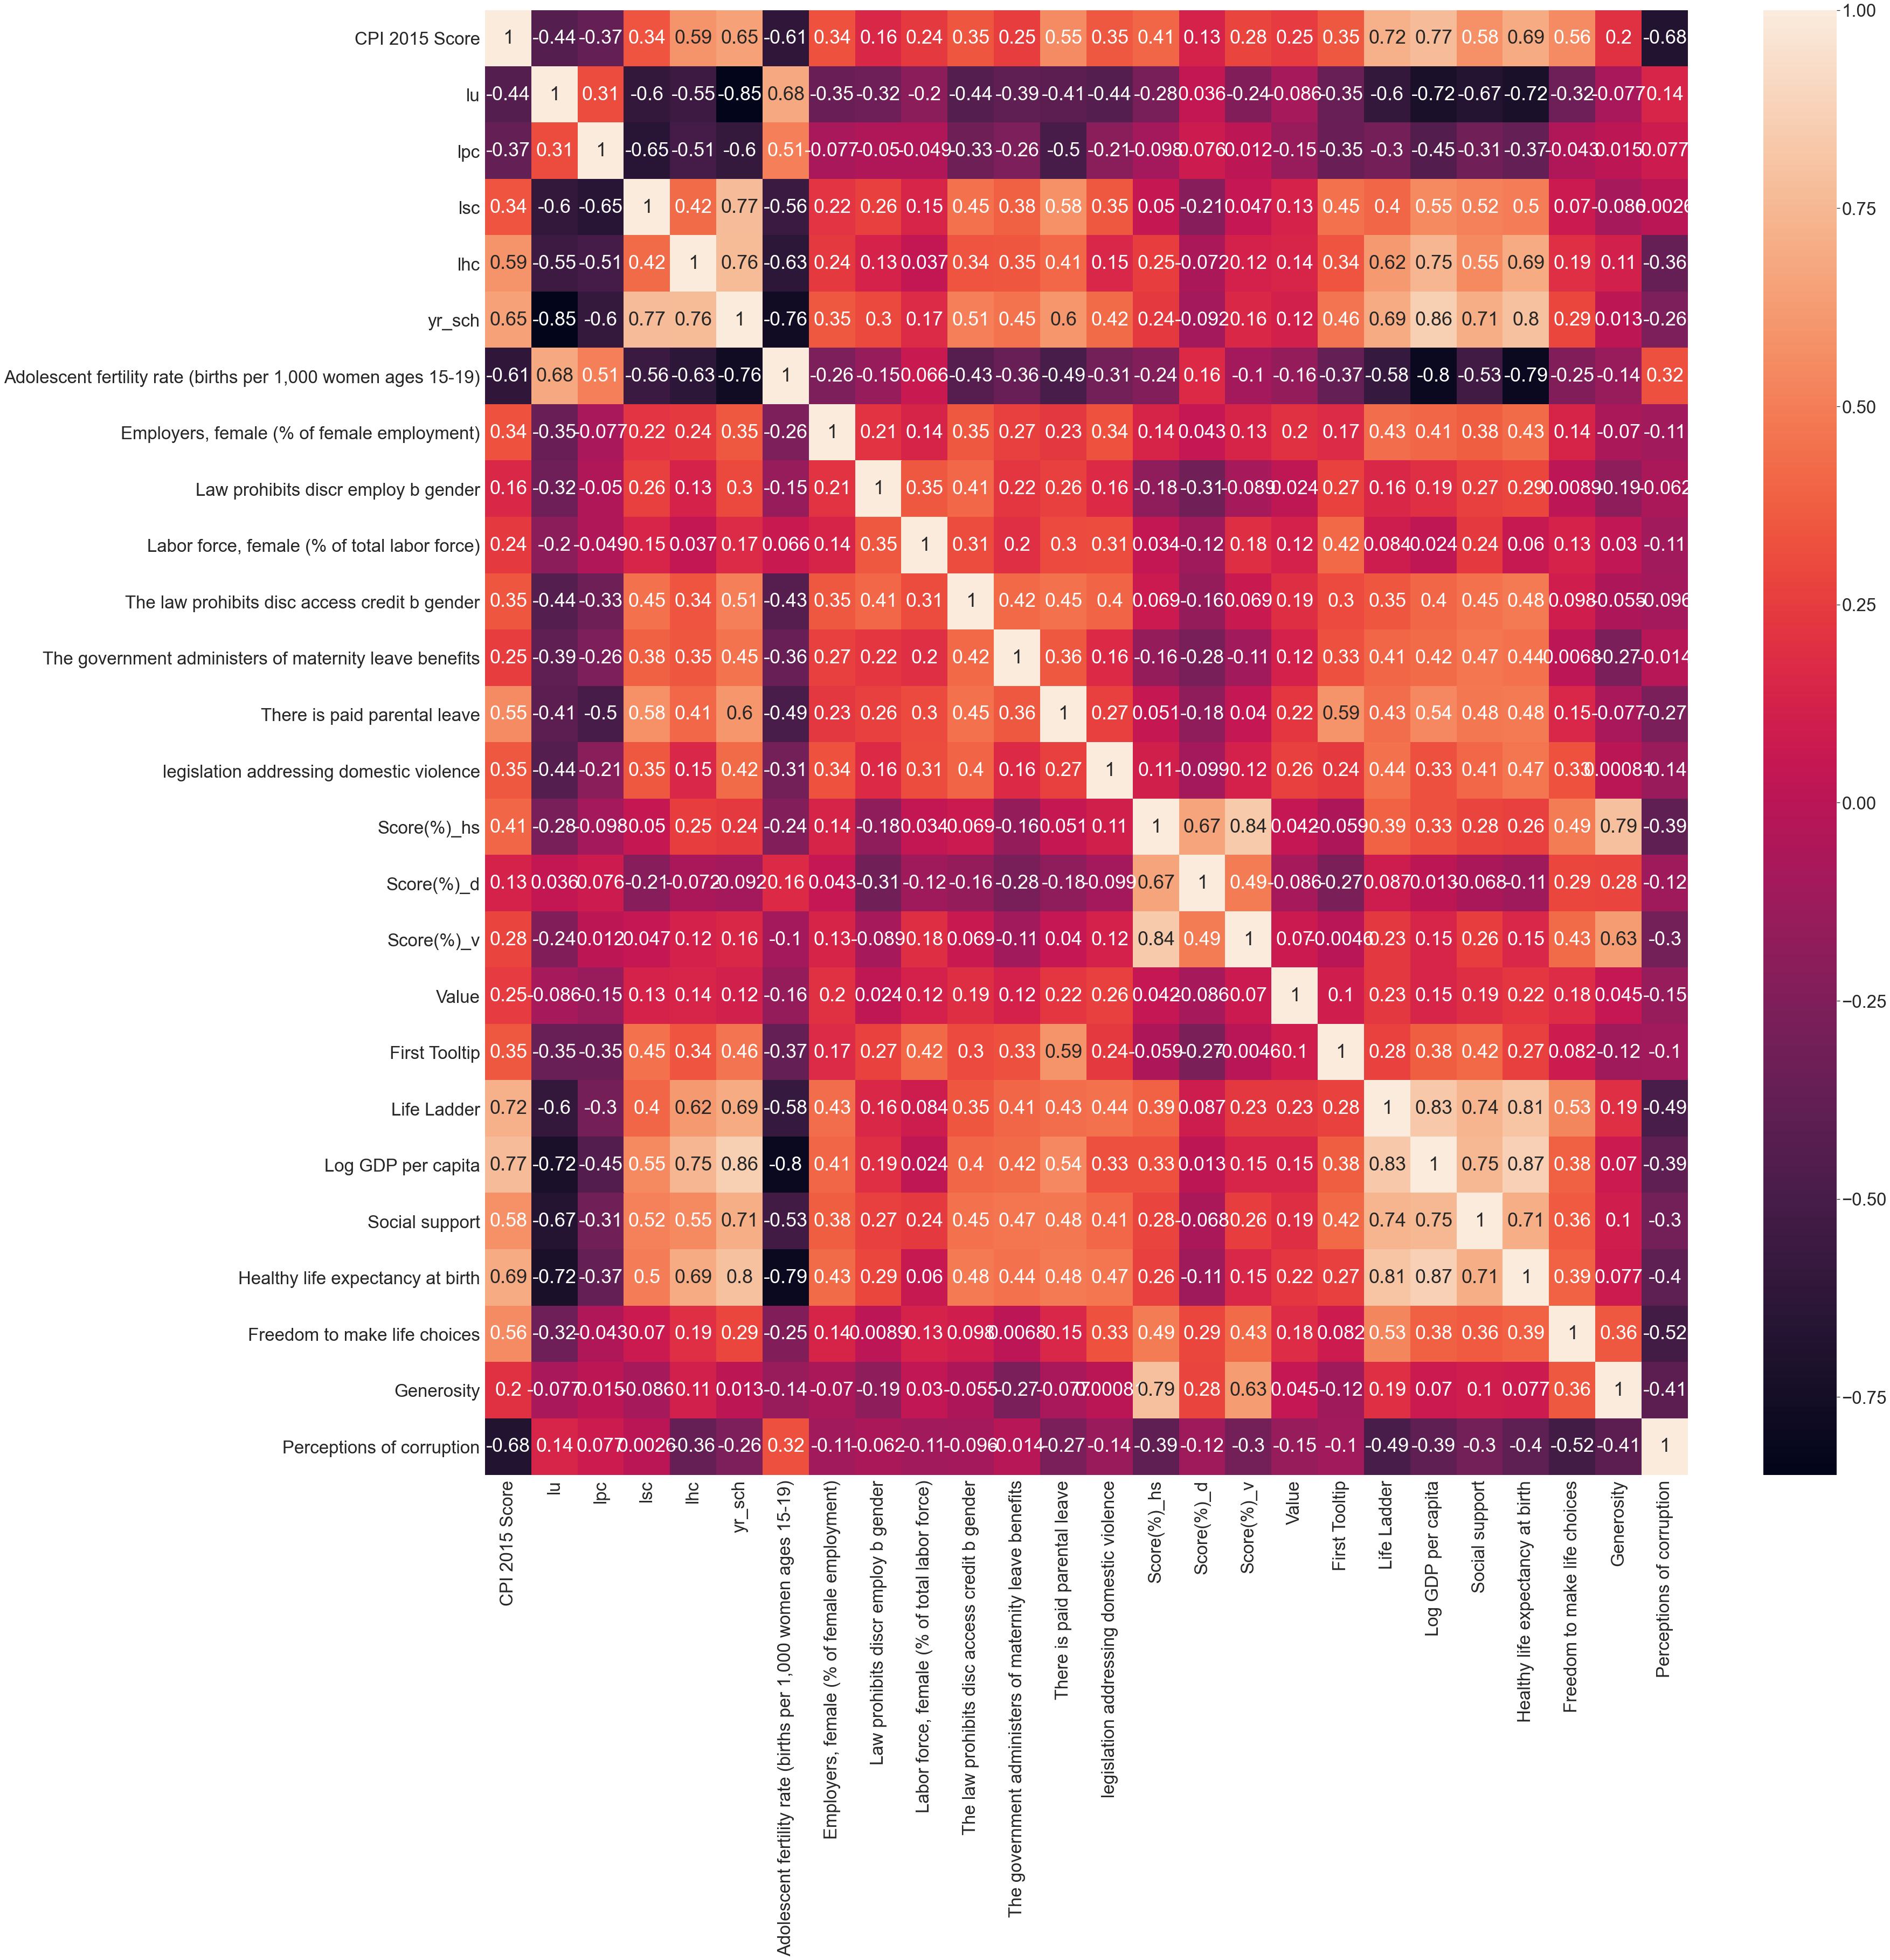

In [22]:
sns.set(font_scale=3)
fig, ax = plt.subplots(figsize=(50,50))  
corr_matrix=data_values.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [301]:
X=data_values.drop(['Life Ladder','Generosity','Social support','Freedom to make life choices','Perceptions of corruption','Law prohibits discr employ b gender','Score(%)_d','First Tooltip','lpc','lu','lhc','Employers, female (% of female employment)','The law prohibits disc access credit b gender','There is paid parental leave','Value','yr_sch'],axis=1)
y=data_values['Life Ladder']

In [327]:
X.columns

Index(['CPI 2015 Score', 'lsc',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Labor force, female (% of total labor force)',
       'The government administers of maternity leave benefits',
       'legislation addressing domestic violence', 'Score(%)_hs', 'Score(%)_v',
       'Log GDP per capita', 'Healthy life expectancy at birth'],
      dtype='object')

In [302]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [303]:
X.columns

Index(['CPI 2015 Score', 'lsc',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Labor force, female (% of total labor force)',
       'The government administers of maternity leave benefits',
       'legislation addressing domestic violence', 'Score(%)_hs', 'Score(%)_v',
       'Log GDP per capita', 'Healthy life expectancy at birth'],
      dtype='object')

In [304]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [305]:
transformer1 = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer1.transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(transformer1.transform(X_test),columns=X_test.columns)

transformer2 = MinMaxScaler().fit(X_train)
X_train_normalized = pd.DataFrame(transformer2.transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(transformer2.transform(X_test), columns=X_test.columns)

In [311]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [312]:
LR_scaled = linear_model.LinearRegression()
model1=LR_scaled.fit(X_train_scaled, y_train)
LR_scaled.score(X_test_scaled, y_test)

0.716597927487803

In [319]:
LR_normalized = linear_model.LinearRegression()
model2=LR_normalized.fit(X_train_normalized, y_train)
LR_normalized.score(X_test_normalized, y_test)
predictions=model2.predict(X_test_normalized)

In [320]:
mean_squared_error(y_test, predictions)

0.31604019760547614

In [325]:
data.to_csv('FINAL.csv')

In [326]:
data.dtypes

country                                                           object
CPI 2015 Score                                                     int64
lu                                                               float64
lpc                                                              float64
lsc                                                              float64
lhc                                                              float64
yr_sch                                                           float64
Adolescent fertility rate (births per 1,000 women ages 15-19)    float64
Employers, female (% of female employment)                       float64
Law prohibits discr employ b gender                                int64
Labor force, female (% of total labor force)                     float64
The law prohibits disc access credit b gender                      int64
The government administers of maternity leave benefits             int64
There is paid parental leave                       